# Henry Salgado
# Date: 10.06.24


This notebook performs a Mann-Whitney U test (since the data is not normally distributed). 

In [29]:
import pandas as pd
import numpy as np
import scipy 


non_response_codes = [96, 97, 98, 99]

instructional_data = pd.read_excel('hsi_stem_instructional.xlsx')
instructional_data.replace(non_response_codes, np.nan, inplace=True)


# Questions: 
* Q250A: Department as a place to work - All things considered, your department as a place to work
* Q250B:	Institution as a place to work - All things considered, your institution as a place to work

In [53]:
import numpy as np
from scipy.stats import wilcoxon


# Ordinal satisfaction scores
dept_satisfaction = instructional_data['q250a']  
inst_satisfaction = instructional_data['q250b']  

# Remove rows where either satisfaction value is NaN
valid_data = instructional_data.dropna(subset=['q250a', 'q250b'])

# Use the valid (non-NaN) values for analysis
dept_satisfaction = valid_data['q250a']
inst_satisfaction = valid_data['q250b']

# Perform the Wilcoxon signed-rank test
stat, p_value = wilcoxon(dept_satisfaction, inst_satisfaction)

# Output test results
print(f'Wilcoxon Test Statistic: {stat}')
print(f'p-value: {p_value}')

z = abs(norm.ppf(p_value / 2))  

# Number of non-zero differences (i.e., exclude zero differences for Wilcoxon test)
n = np.sum(dept_satisfaction != inst_satisfaction)


# Calculate the effect size r
effect_size = z / np.sqrt(n)

# Output the effect size
print(f'Effect Size (r): {effect_size}')



Wilcoxon Test Statistic: 12697.5
p-value: 1.3764787522537598e-05
Effect Size (r): 0.2660675746207555


# Insight: 
The results of a Wilcoxon signed-rank test revealed a statistically significant difference in satisfaction between the department and institution levels (U = 12,697.5, p < 0.001). The effect size is medium (r = 0.266)

# Which satisfaction is greater?

Let's calculate the medium differences to see which form of satisfaction is better. 

In [52]:

# Calculate the differences between department and institution satisfaction
differences = dept_satisfaction - inst_satisfaction

# Calculate the median of the differences
median_difference = np.median(differences)
print(f'Median of differences (Dept - Inst): {median_difference}')

# Interpretation for ordinal data
if median_difference > 0:
    print("Department satisfaction is generally higher than institutional satisfaction.")
elif median_difference < 0:
    print("Institutional satisfaction is generally higher than department satisfaction.")
else:
    print("No general difference in satisfaction levels.")

Median of differences (Dept - Inst): 0.0
No general difference in satisfaction levels.


# No raw difference?
Oddly, there is a statistcal difference, and a medium effect size, yet no raw differences between dep and inst satisfaction. 

# Using another tool to see differences. 


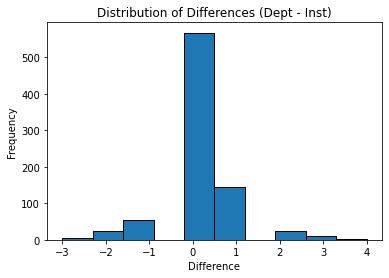

In [35]:
import matplotlib.pyplot as plt

# Calculate differences
differences = dept_satisfaction - inst_satisfaction

# Plot a histogram of the differences
plt.hist(differences, bins=10, edgecolor='black')
plt.title('Distribution of Differences (Dept - Inst)')
plt.xlabel('Difference')
plt.ylabel('Frequency')
plt.show()



# Insight 

The majority of the data is concentrated at a difference of 0, indicating that for most respondents, there is no significant difference between their satisfaction with their department and their satisfaction with their institution.

There are more positive differences than negative ones. The bar for a difference of 1 is quite large compared to the bars for negative differences, suggesting that some respondents tend to rate their department satisfaction higher than their institutional satisfaction

In [36]:
std_diff = np.std(differences)
iqr_diff = np.percentile(differences, 75) - np.percentile(differences, 25)

print(f'Standard Deviation of Differences: {std_diff}')
print(f'Interquartile Range (IQR) of Differences: {iqr_diff}')


Standard Deviation of Differences: 0.8179743275840511
Interquartile Range (IQR) of Differences: 0.0


# Insight

Most respondents have little to no difference in satisfaction between department and institutional levels.
However, there are a few extreme cases,  which are significantly driving the variability and contributing to the large effect size.

This plot supports the earlier finding: the median and IQR are zero, but the large standard deviation and effect size arise from a small subset of respondents with extreme differences.

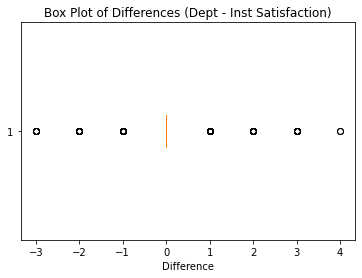

In [37]:
import matplotlib.pyplot as plt

# Box plot of the differences
plt.boxplot(differences, vert=False)
plt.title('Box Plot of Differences (Dept - Inst Satisfaction)')
plt.xlabel('Difference')
plt.show()


In [50]:
outliers = valid_data[(differences < -1) | (differences > 1)]

print(len(outliers))

67


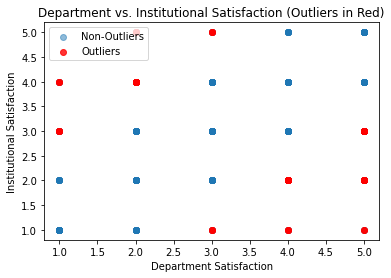

In [51]:
import matplotlib.pyplot as plt

# Scatter plot showing all respondents, with outliers highlighted
plt.scatter(valid_data['q250a'], valid_data['q250b'], label="Non-Outliers", alpha=0.5)
plt.scatter(outliers['q250a'], outliers['q250b'], color='red', label="Outliers", alpha=0.8)
plt.xlabel('Department Satisfaction')
plt.ylabel('Institutional Satisfaction')
plt.legend()
plt.title('Department vs. Institutional Satisfaction (Outliers in Red)')
plt.show()


# Next Steps

* Further investigate outliers